In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# data downloaded from kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip

df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Understanding:
#### Time: Number of seconds elapsed between this transaction and the first transaction in the dataset
#### V1: Result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
#### Amount: Transaction amount
##### Class: 1 for fraudulent transactions, 0 otherwise

In [4]:
df['Class'].value_counts()   # Check the number of fradulent vs normal transactions (Note: Class=1 is fradulent)

0    284315
1       492
Name: Class, dtype: int64

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


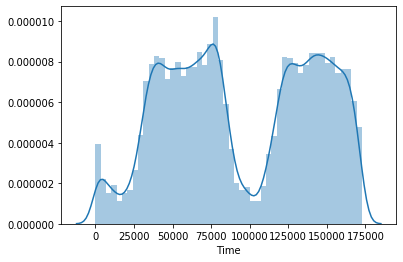

In [5]:
sns.distplot(df['Time'])     # Visualizing the distribution of elasped time 

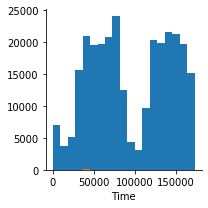

In [6]:
bins = np.linspace(df.Time.min(), df.Time.max(), 20)
g = sns.FacetGrid(df, hue='Class')
g.map(plt.hist, 'Time', bins=bins)

plt.show()

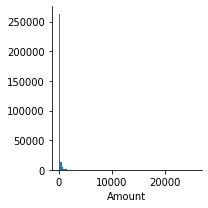

In [7]:
bins = np.linspace(df.Amount.min(), df.Amount.max(), 100)
g = sns.FacetGrid(df, hue='Class')
g.map(plt.hist, 'Amount', bins=bins, range=[df.Amount.min(),df.Amount.max()])

plt.show()

##### Histogram plots are not the perfect way to represent these data since the size of the fradulent data is very small. So let's use boxplots.

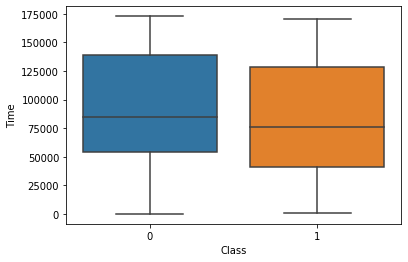

In [8]:
ax = sns.boxplot(x="Class", y="Time", data=df) 

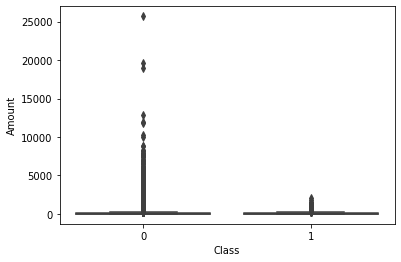

In [9]:
ax = sns.boxplot(x="Class", y="Amount", data=df) 


Feature Selection:
  For the analysis I select all the columns(except Class) present for predicting fradulent transactions.


In [16]:
Feature = df.drop('Class',axis=1)


In [21]:
X=Feature
X= preprocessing.StandardScaler().fit(X).transform(X) # Standardizing the X predictor
X[0:2]


array([[-1.99658302, -0.69424232, -0.04407492,  1.6727735 ,  0.97336551,
        -0.24511658,  0.34706795,  0.19367894,  0.08263728,  0.33112778,
         0.08338555, -0.54040704, -0.61829572, -0.99609892, -0.32461019,
         1.60401384, -0.53683287,  0.24486345,  0.03076993,  0.49628203,
         0.32611802, -0.02492336,  0.38285444, -0.17691133,  0.11050692,
         0.24658544, -0.39217043,  0.33089162, -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592,  0.1097971 ,  0.31652293,
         0.04348335, -0.06181997, -0.06370021,  0.07125348, -0.23249419,
        -0.15334963,  1.58000285,  1.06608857,  0.4914182 , -0.14998248,
         0.69436042,  0.52943375, -0.13516997, -0.21876258, -0.17908605,
        -0.08961086, -0.3073768 , -0.88007675,  0.16220118, -0.56113055,
         0.3206939 ,  0.26106948, -0.02225568,  0.04460752, -0.34247454]])

In [19]:
y=df['Class'].values   
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

#### Applying Machine Learning for predicting fradulent transactions:


### K Nearest Neighbors(KNN) 

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.01)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (281958, 30) (281958,)
Test set: (2849, 30) (2849,)


In [26]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhatKNN=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhatKNN)

    
    std_acc[n-1]=np.std(yhatKNN==y_test)/np.sqrt(yhatKNN.shape[0])

mean_acc

array([0.999298, 0.998947, 0.999298, 0.999649, 0.999298, 0.999298,
       0.998947, 0.998947, 0.998947])

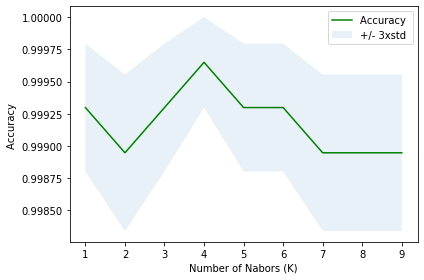

The best accuracy was with 0.9996489996489997 with k= 4


In [27]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree 
decTree.fit(X_train,y_train)
predTree = decTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_test != predTree).sum()))

DecisionTrees's Accuracy:  0.9992979992979993
Number of mislabeled points out of a total 281958 points : 2


### Support VectorMachine

In [33]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhatSVM = clf.predict(X_test)
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhatSVM))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM's Accuracy:  0.9996489996489997


### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print("Logistic Regression's Accuracy: ", jaccard_similarity_score(y_test, yhatLR))
print ('Log Loss for Logistic Regression:', log_loss(y_test, yhatLR))


Logistic Regression's Accuracy:  0.9992979992979993
Log Loss for Logistic Regression: 0.024246245275473574


### Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
yhatGNB = gnb.fit(X_train, y_train).predict(X_test)
print("Naive Bias's Accuracy: ", jaccard_similarity_score(y_test, yhatGNB))


Naive Bias's Accuracy:  0.9792909792909793


### Comparative Study

In [41]:
from sklearn.metrics import f1_score
#KNN
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhatKNN_test=neigh.predict(X_test)
print ('Jaccard score for KNN:', jaccard_similarity_score(y_test, yhatKNN_test))
print ('F1 score for KNN:', f1_score(y_test, yhatKNN_test,average='weighted'))
#print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_test != yhatGNB).sum()))

#Decision Tree
print ('Jaccard score for Decision Tree:', jaccard_similarity_score(y_test, predTree))
print ('F1 score for Decision Tree:', f1_score(y_test, predTree,average='weighted'))


#Support Vector Machnine
print ('Jaccard score for SVM:', jaccard_similarity_score(y_test, yhatSVM))
print ('F1 score for SVM:', f1_score(y_test, yhatSVM,average='weighted'))

#Logistic Regression
print ('Jaccard score for Logistic Regression:', jaccard_similarity_score(y_test, yhatLR))
print ('F1 score for Logistic Regression:', f1_score(y_test, yhatLR,average='weighted'))


#Naive Bias
print ('Jaccard score for GNB:', jaccard_similarity_score(y_test, yhatGNB))
print ('F1 score for GNB:', f1_score(y_test, yhatGNB,average='weighted'))


Jaccard score for KNN: 0.9996489996489997
F1 score for KNN: 0.9996239590335532
Number of mislabeled points out of a total 281958 points : 59
Jaccard score for Decision Tree: 0.9992979992979993
F1 score for Decision Tree: 0.9992979992979993
Jaccard score for SVM: 0.9996489996489997
F1 score for SVM: 0.9996239590335532
Jaccard score for Logistic Regression: 0.9992979992979993
F1 score for Logistic Regression: 0.9991811225121132
Jaccard score for GNB: 0.9792909792909793
F1 score for GNB: 0.9882663116818984


#### Seems that the accuracy measures of the models are in the range 97-99%. Though it would be really great to have such accurate predictions, note that the number of fradulent data was only 492 out of 284807 data points which implies only 0.17% of the data are fraudulent. So we should look at the confusion matrix.

Note: The confusion matrix is given in the format <p>[true negetives, false negetives <br>
                                                    true positive, false positives] </p>
                                                    
| nt(Total Size) | Predicted: not Fraud | Predicted:Fraud |
| --- | --- | --- |
| <strong>Actual: not Fraud</strong>  | n(0,0) | n(1,0) |
| <strong>Actual: Fraud</strong> | n(0,1) | n(1,1) |

In [50]:
print('Size of the test sample:',y_test.size)
print('Number of fraudulent data in the test sample:',sum(y_test))

Size of the test sample: 2849
Number of fraudulent data in the test sample: 4


#### KNN

In [42]:
confusion_matrix(y_test, yhatKNN_test)

array([[2845,    0],
       [   1,    3]], dtype=int64)

Though the accuracy of KNN is 99%, from the confusion matrix it can be clearly seen that the number of false positives, To say it in layman's terms, 1 out of 4 times the model failed to predict the fraud.  
So accuracy of the fradulent prediction system is only <strong>75%</strong>. Similarly let's check the accuracy for other models.

#### Decision Tree

In [52]:
confusion_matrix(y_test,  predTree)

array([[2844,    1],
       [   1,    3]], dtype=int64)

#### Support Vector Machine

In [53]:
confusion_matrix(y_test,  yhatSVM)

array([[2845,    0],
       [   1,    3]], dtype=int64)

#### Logistic Regression

In [54]:
confusion_matrix(y_test,  yhatLR)

array([[2845,    0],
       [   2,    2]], dtype=int64)

#### Naive Bias

In [55]:
confusion_matrix(y_test,  yhatGNB)

array([[2787,   58],
       [   1,    3]], dtype=int64)